In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/traffic-accidents/traffic_accidents.csv


In [2]:
df = pd.read_csv("/kaggle/input/traffic-accidents/traffic_accidents.csv")

In [3]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [5]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

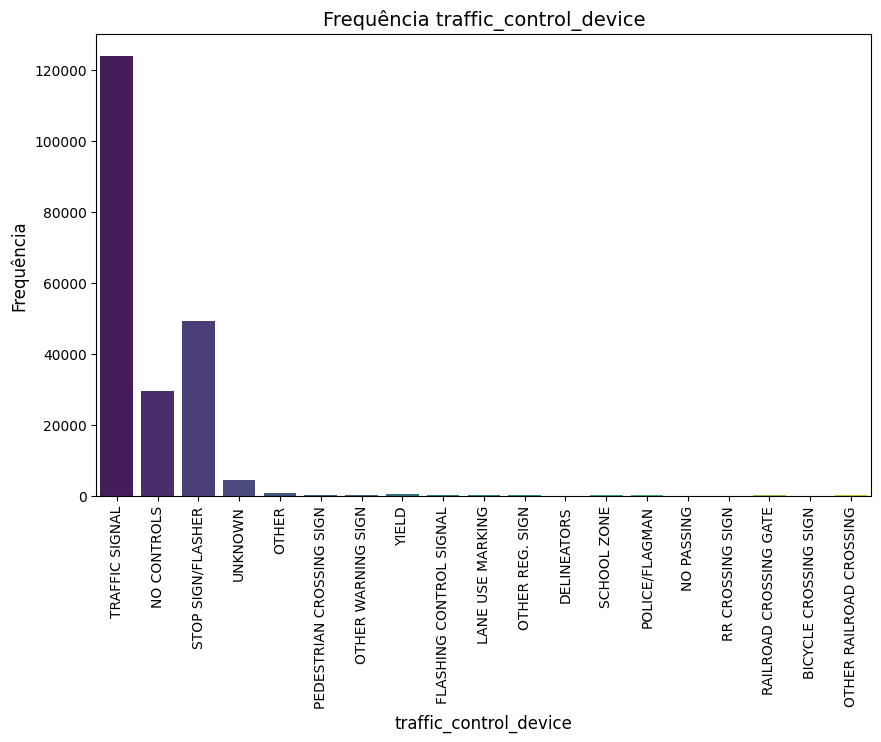

Frequência da coluna traffic_control_device:
      traffic_control_device  Frequência
0             TRAFFIC SIGNAL      123944
1          STOP SIGN/FLASHER       49139
2                NO CONTROLS       29508
3                    UNKNOWN        4455
4                      OTHER         670
5                      YIELD         468
6   PEDESTRIAN CROSSING SIGN         247
7            OTHER REG. SIGN         181
8           LANE USE MARKING         153
9    FLASHING CONTROL SIGNAL         150
10            POLICE/FLAGMAN         104
11        OTHER WARNING SIGN          95
12    RAILROAD CROSSING GATE          78
13               SCHOOL ZONE          33
14   OTHER RAILROAD CROSSING          23
15          RR CROSSING SIGN          18
16               DELINEATORS          17
17                NO PASSING          12
18     BICYCLE CROSSING SIGN          11


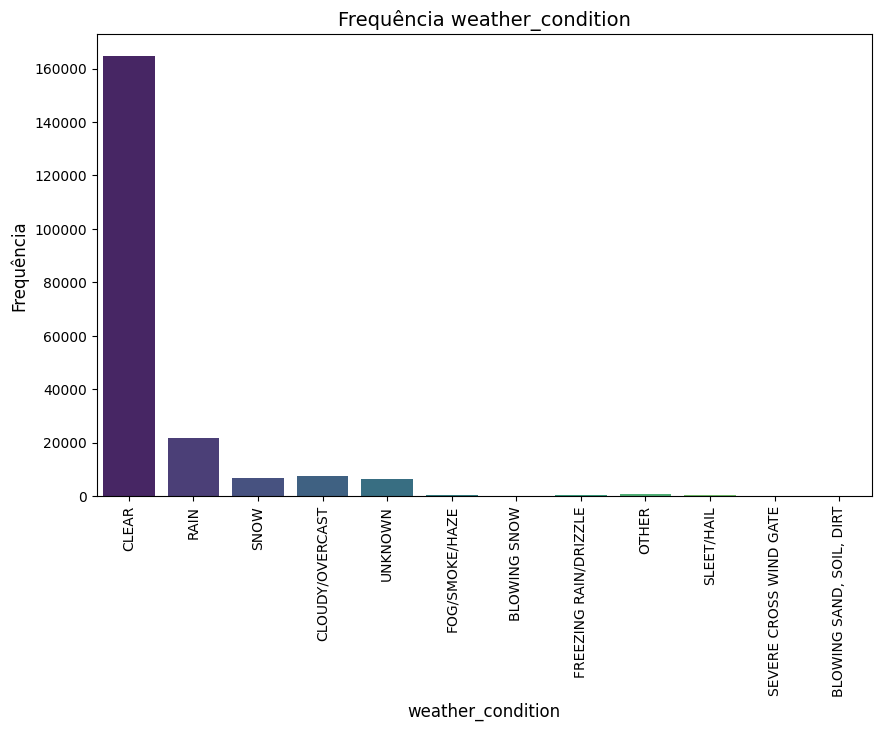

Frequência da coluna weather_condition:
           weather_condition  Frequência
0                      CLEAR      164700
1                       RAIN       21703
2            CLOUDY/OVERCAST        7533
3                       SNOW        6871
4                    UNKNOWN        6534
5                      OTHER         627
6      FREEZING RAIN/DRIZZLE         510
7             FOG/SMOKE/HAZE         360
8                 SLEET/HAIL         308
9               BLOWING SNOW         127
10    SEVERE CROSS WIND GATE          32
11  BLOWING SAND, SOIL, DIRT           1


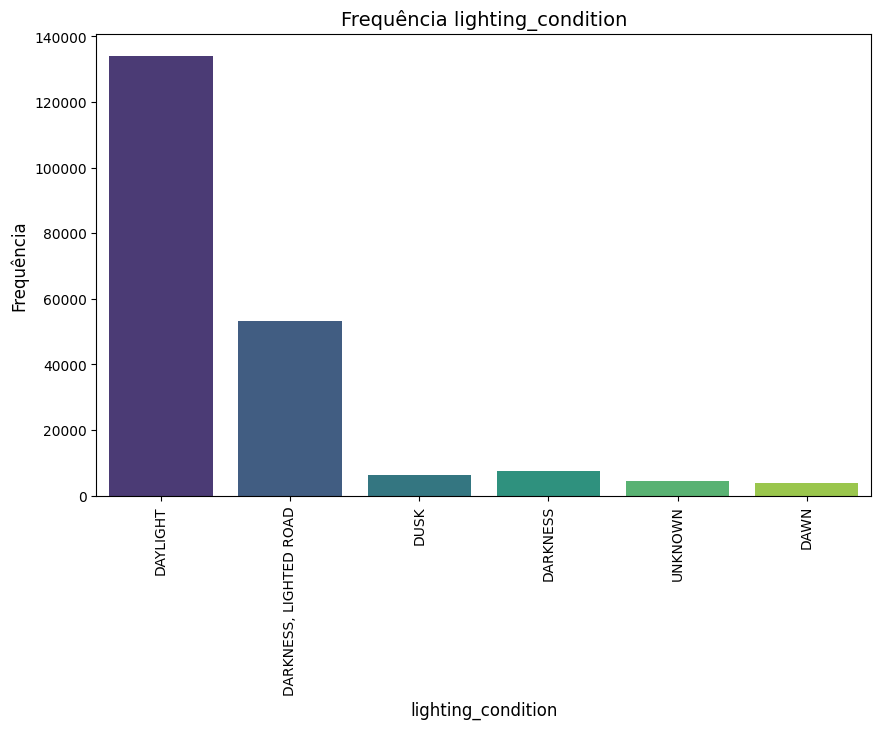

Frequência da coluna lighting_condition:
       lighting_condition  Frequência
0                DAYLIGHT      134109
1  DARKNESS, LIGHTED ROAD       53378
2                DARKNESS        7436
3                    DUSK        6323
4                 UNKNOWN        4336
5                    DAWN        3724


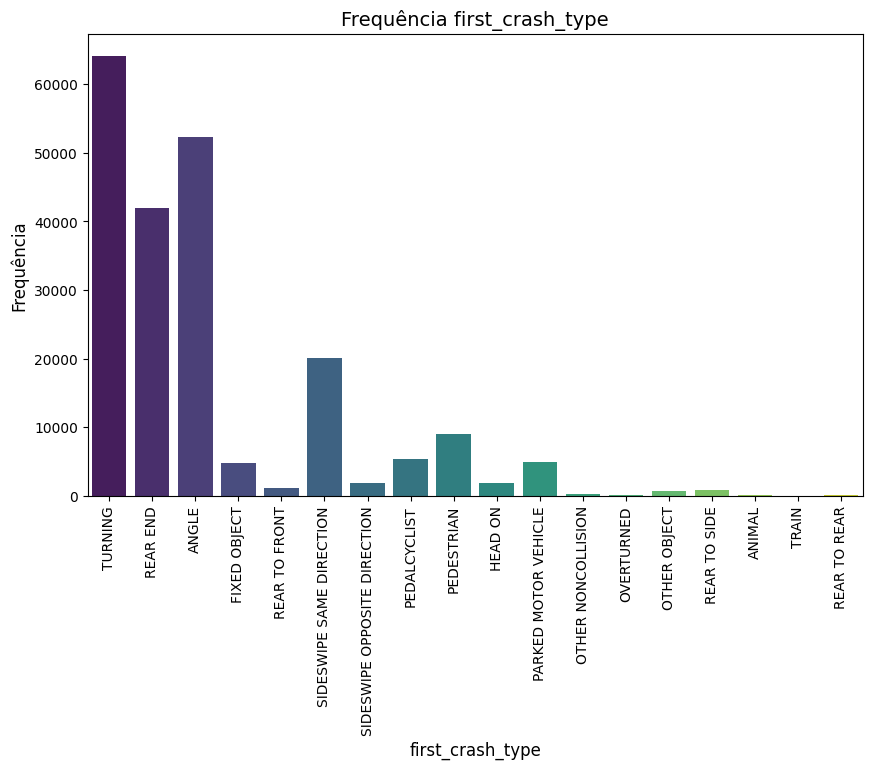

Frequência da coluna first_crash_type:
                first_crash_type  Frequência
0                        TURNING       64157
1                          ANGLE       52250
2                       REAR END       42018
3       SIDESWIPE SAME DIRECTION       20116
4                     PEDESTRIAN        8996
5                   PEDALCYCLIST        5337
6           PARKED MOTOR VEHICLE        4893
7                   FIXED OBJECT        4742
8   SIDESWIPE OPPOSITE DIRECTION        1839
9                        HEAD ON        1790
10                 REAR TO FRONT        1157
11                  REAR TO SIDE         773
12                  OTHER OBJECT         759
13            OTHER NONCOLLISION         249
14                    OVERTURNED          96
15                        ANIMAL          77
16                  REAR TO REAR          49
17                         TRAIN           8


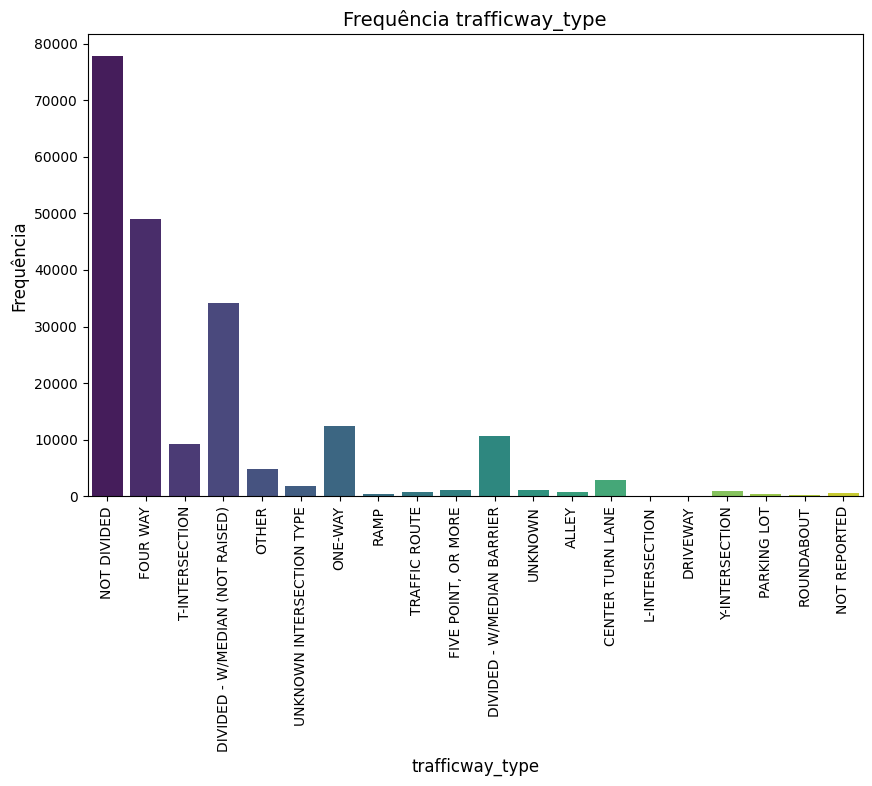

Frequência da coluna trafficway_type:
                    trafficway_type  Frequência
0                       NOT DIVIDED       77753
1                          FOUR WAY       49057
2   DIVIDED - W/MEDIAN (NOT RAISED)       34221
3                           ONE-WAY       12341
4        DIVIDED - W/MEDIAN BARRIER       10720
5                    T-INTERSECTION        9233
6                             OTHER        4757
7                  CENTER TURN LANE        2862
8         UNKNOWN INTERSECTION TYPE        1885
9               FIVE POINT, OR MORE        1119
10                          UNKNOWN        1060
11                   Y-INTERSECTION         958
12                    TRAFFIC ROUTE         776
13                            ALLEY         741
14                     NOT REPORTED         581
15                      PARKING LOT         448
16                             RAMP         375
17                       ROUNDABOUT         149
18                         DRIVEWAY         143
19

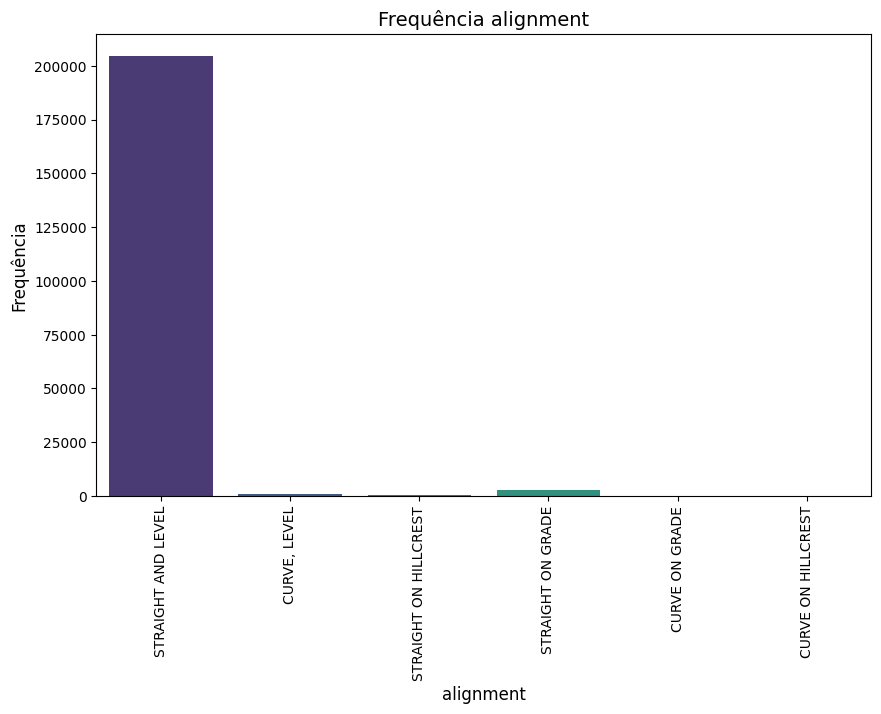

Frequência da coluna alignment:
               alignment  Frequência
0     STRAIGHT AND LEVEL      204590
1      STRAIGHT ON GRADE        2992
2           CURVE, LEVEL        1014
3  STRAIGHT ON HILLCREST         478
4         CURVE ON GRADE         179
5     CURVE ON HILLCREST          53


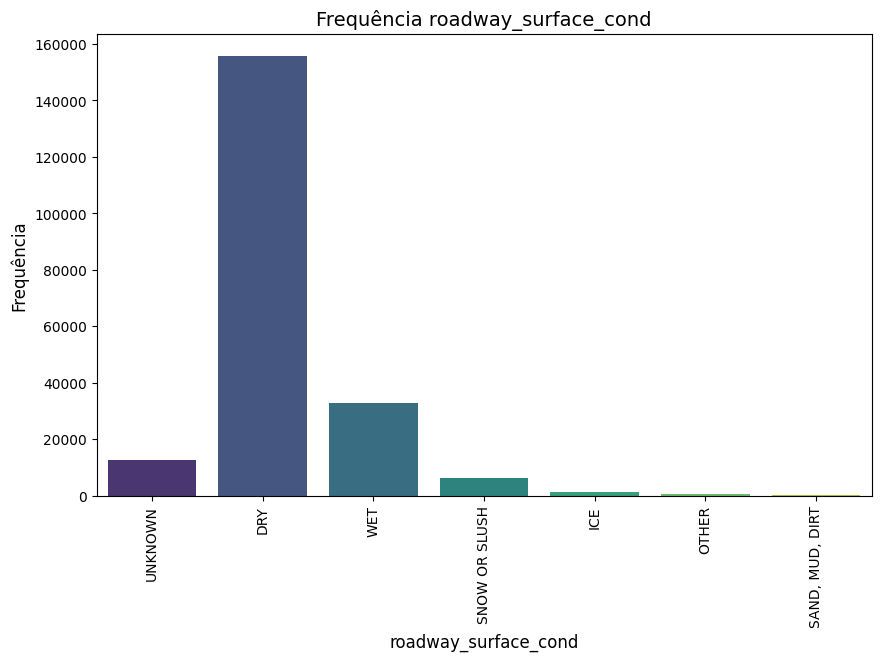

Frequência da coluna roadway_surface_cond:
  roadway_surface_cond  Frequência
0                  DRY      155905
1                  WET       32908
2              UNKNOWN       12509
3        SNOW OR SLUSH        6203
4                  ICE        1303
5                OTHER         438
6      SAND, MUD, DIRT          40


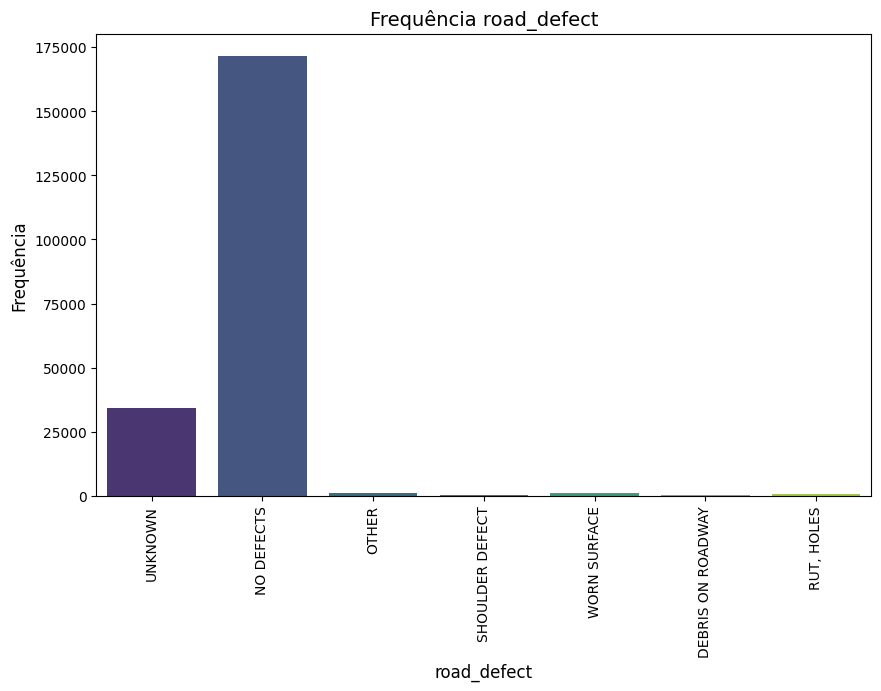

Frequência da coluna road_defect:
         road_defect  Frequência
0         NO DEFECTS      171730
1            UNKNOWN       34426
2       WORN SURFACE        1000
3              OTHER         912
4         RUT, HOLES         741
5    SHOULDER DEFECT         358
6  DEBRIS ON ROADWAY         139


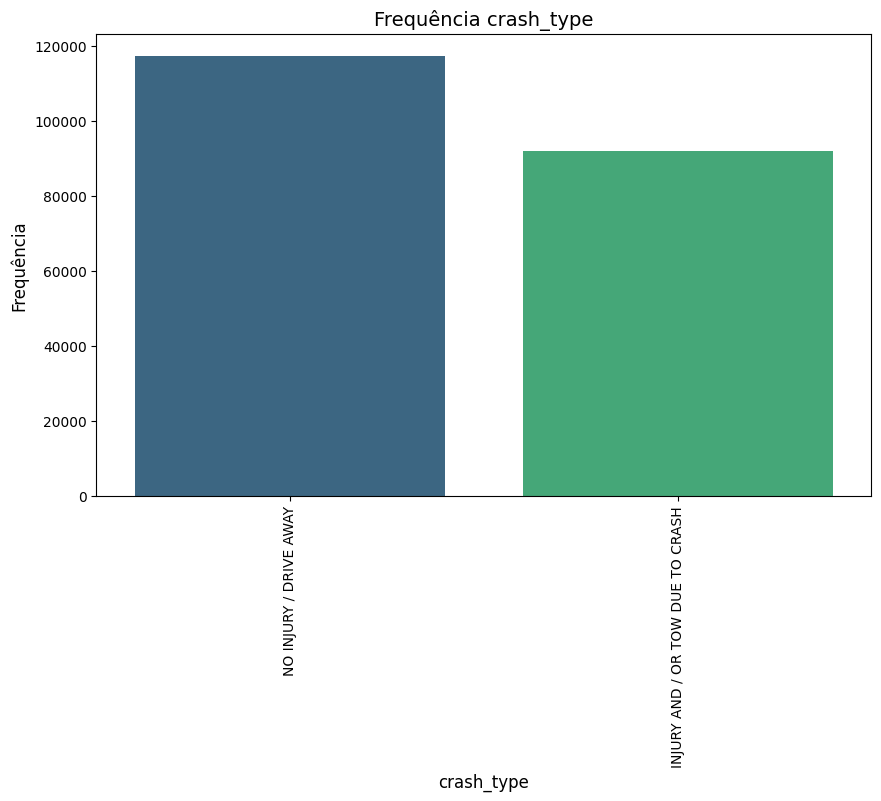

Frequência da coluna crash_type:
                         crash_type  Frequência
0            NO INJURY / DRIVE AWAY      117376
1  INJURY AND / OR TOW DUE TO CRASH       91930


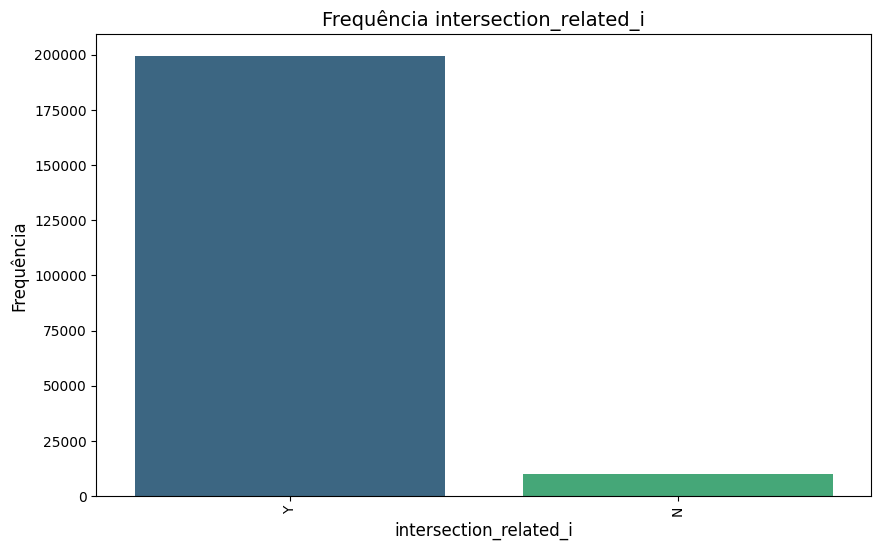

Frequência da coluna intersection_related_i:
  intersection_related_i  Frequência
0                      Y      199324
1                      N        9982


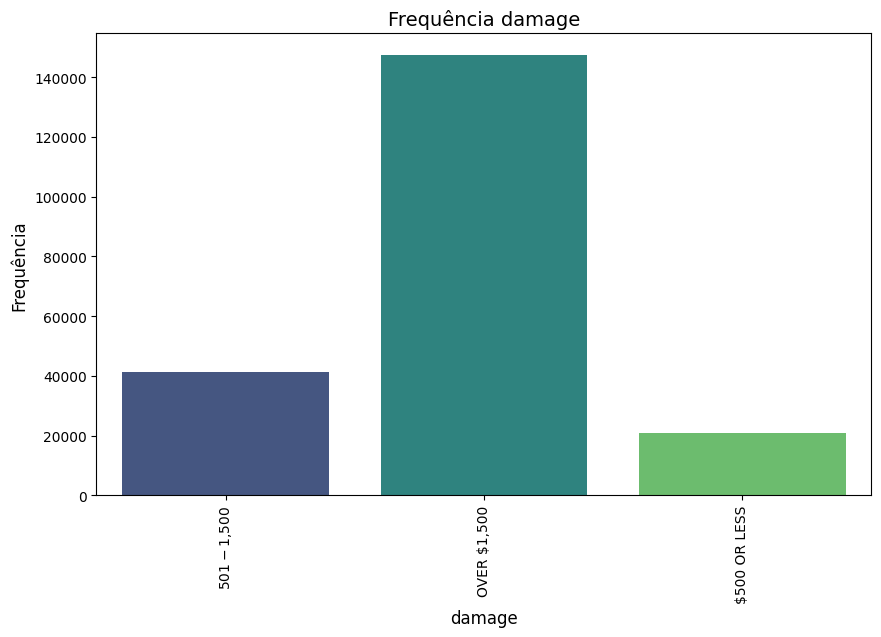

Frequência da coluna damage:
          damage  Frequência
0    OVER $1,500      147313
1  $501 - $1,500       41210
2   $500 OR LESS       20783


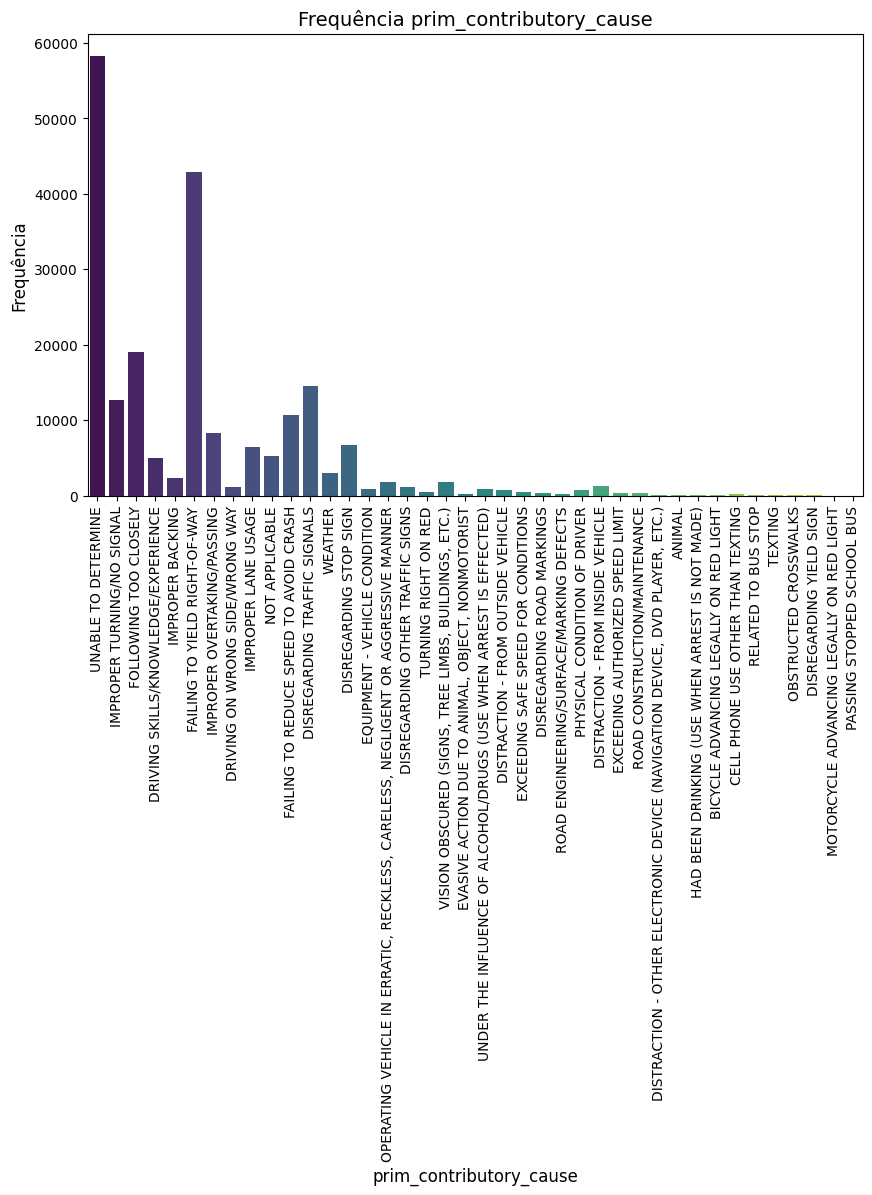

Frequência da coluna prim_contributory_cause:
                              prim_contributory_cause  Frequência
0                                 UNABLE TO DETERMINE       58316
1                       FAILING TO YIELD RIGHT-OF-WAY       42914
2                               FOLLOWING TOO CLOSELY       19084
3                        DISREGARDING TRAFFIC SIGNALS       14591
4                          IMPROPER TURNING/NO SIGNAL       12643
5              FAILING TO REDUCE SPEED TO AVOID CRASH       10676
6                         IMPROPER OVERTAKING/PASSING        8302
7                              DISREGARDING STOP SIGN        6749
8                                 IMPROPER LANE USAGE        6462
9                                      NOT APPLICABLE        5241
10                DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        5048
11                                            WEATHER        3074
12                                   IMPROPER BACKING        2340
13  OPERATING VEHICLE IN ERRAT

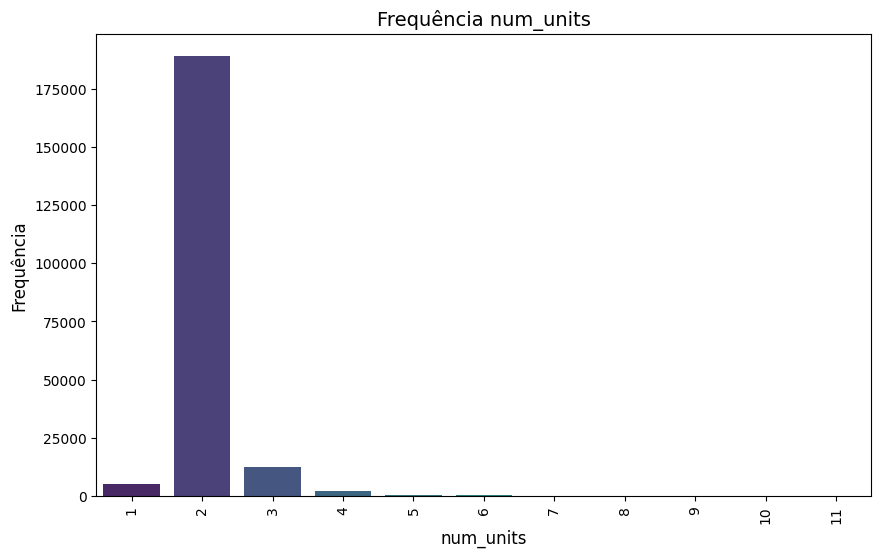

Frequência da coluna num_units:
    num_units  Frequência
0           2      189366
1           3       12251
2           1        5123
3           4        1908
4           5         453
5           6         135
6           7          34
7           8          22
8           9           9
9          10           4
10         11           1


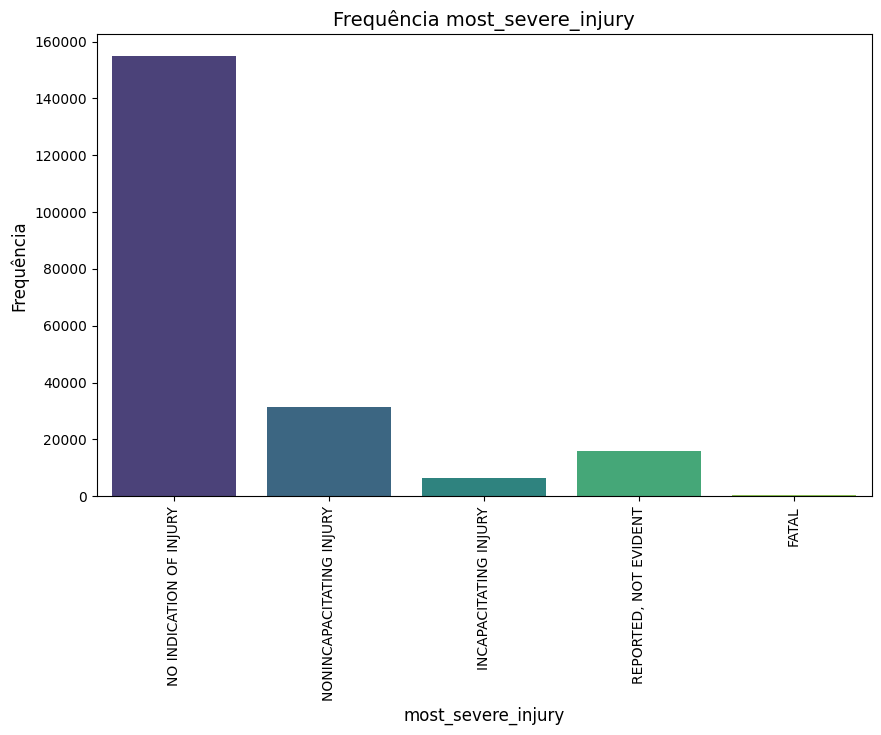

Frequência da coluna most_severe_injury:
         most_severe_injury  Frequência
0   NO INDICATION OF INJURY      154789
1  NONINCAPACITATING INJURY       31527
2     REPORTED, NOT EVIDENT       16075
3     INCAPACITATING INJURY        6564
4                     FATAL         351


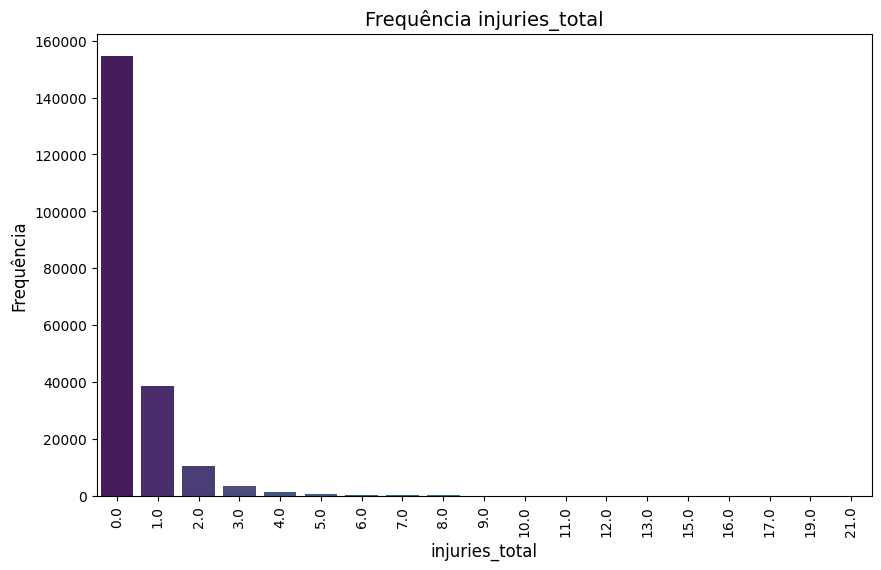

Frequência da coluna injuries_total:
    injuries_total  Frequência
0              0.0      154789
1              1.0       38378
2              2.0       10447
3              3.0        3505
4              4.0        1338
5              5.0         488
6              6.0         212
7              7.0          80
8              8.0          30
9              9.0          14
10            10.0           7
11            11.0           5
12            15.0           4
13            12.0           3
14            21.0           2
15            16.0           1
16            17.0           1
17            19.0           1
18            13.0           1


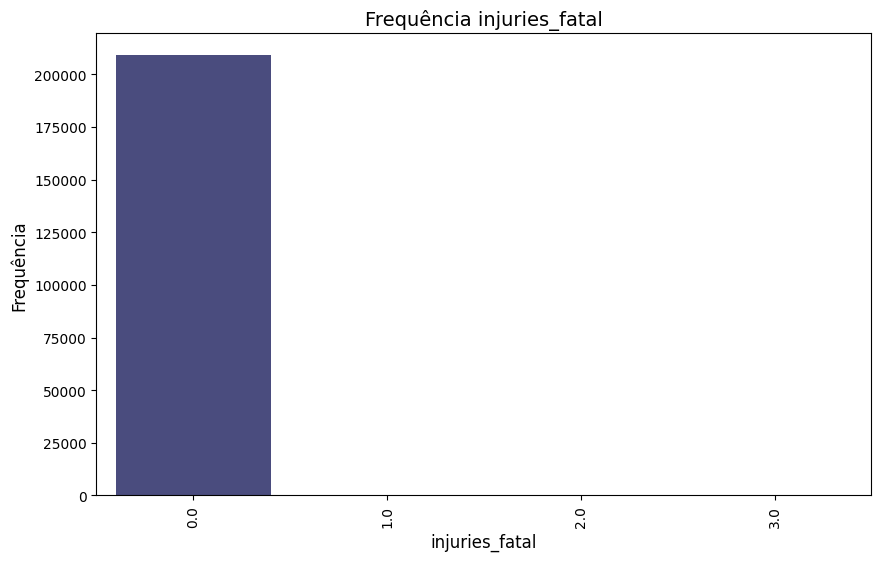

Frequência da coluna injuries_fatal:
   injuries_fatal  Frequência
0             0.0      208955
1             1.0         317
2             2.0          30
3             3.0           4


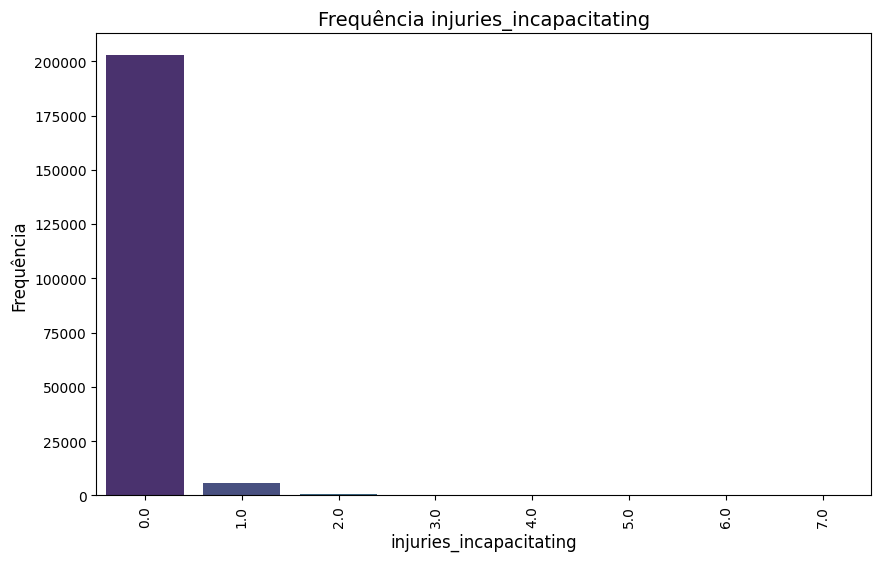

Frequência da coluna injuries_incapacitating:
   injuries_incapacitating  Frequência
0                      0.0      202672
1                      1.0        5682
2                      2.0         683
3                      3.0         182
4                      4.0          62
5                      5.0          19
6                      6.0           4
7                      7.0           2


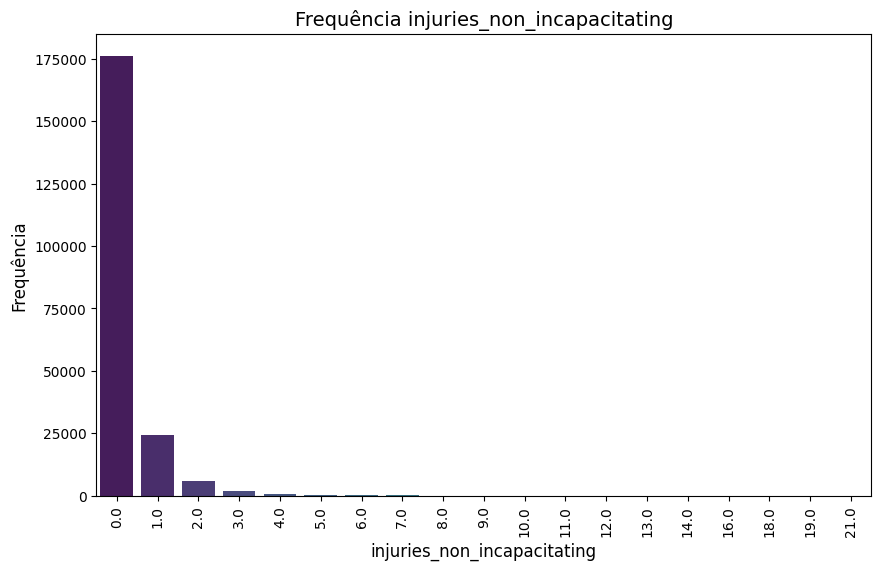

Frequência da coluna injuries_non_incapacitating:
    injuries_non_incapacitating  Frequência
0                           0.0      176306
1                           1.0       24413
2                           2.0        5688
3                           3.0        1828
4                           4.0         667
5                           5.0         232
6                           6.0         106
7                           7.0          33
8                           8.0          15
9                          10.0           5
10                          9.0           5
11                         14.0           1
12                         19.0           1
13                         18.0           1
14                         21.0           1
15                         12.0           1
16                         11.0           1
17                         16.0           1
18                         13.0           1


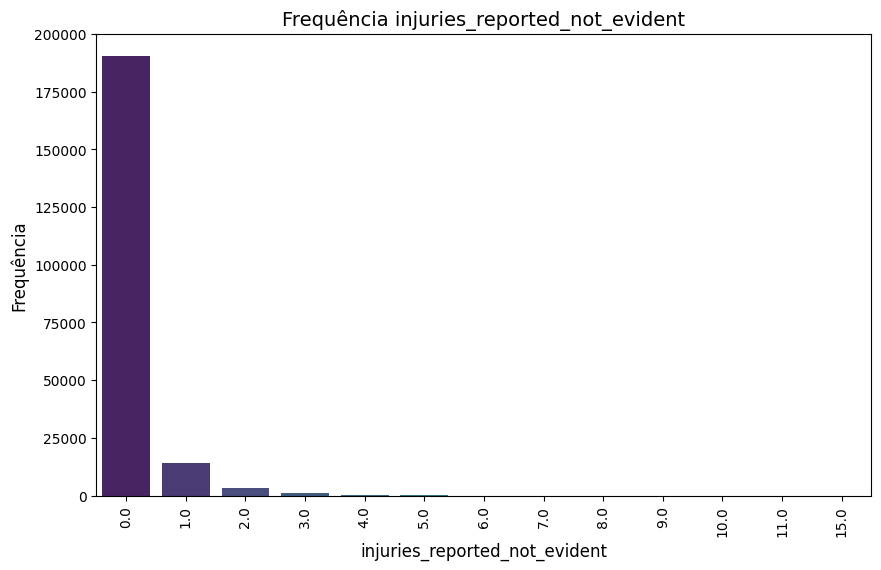

Frequência da coluna injuries_reported_not_evident:
    injuries_reported_not_evident  Frequência
0                             0.0      190619
1                             1.0       14029
2                             2.0        3302
3                             3.0         904
4                             4.0         289
5                             5.0         105
6                             6.0          29
7                             7.0          15
8                             8.0           7
9                             9.0           3
10                           10.0           2
11                           15.0           1
12                           11.0           1


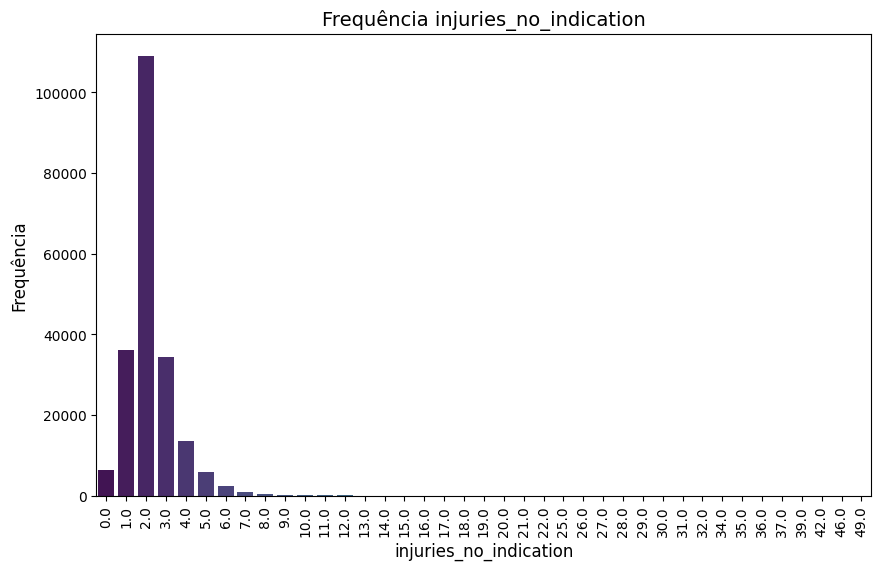

Frequência da coluna injuries_no_indication:
    injuries_no_indication  Frequência
0                      2.0      109130
1                      1.0       36148
2                      3.0       34350
3                      4.0       13453
4                      0.0        6229
5                      5.0        5781
6                      6.0        2458
7                      7.0         945
8                      8.0         395
9                      9.0         188
10                    10.0          86
11                    11.0          32
12                    12.0          24
13                    14.0          16
14                    13.0          12
15                    16.0           8
16                    15.0           8
17                    17.0           5
18                    27.0           4
19                    19.0           4
20                    20.0           4
21                    28.0           3
22                    26.0           3
23                 

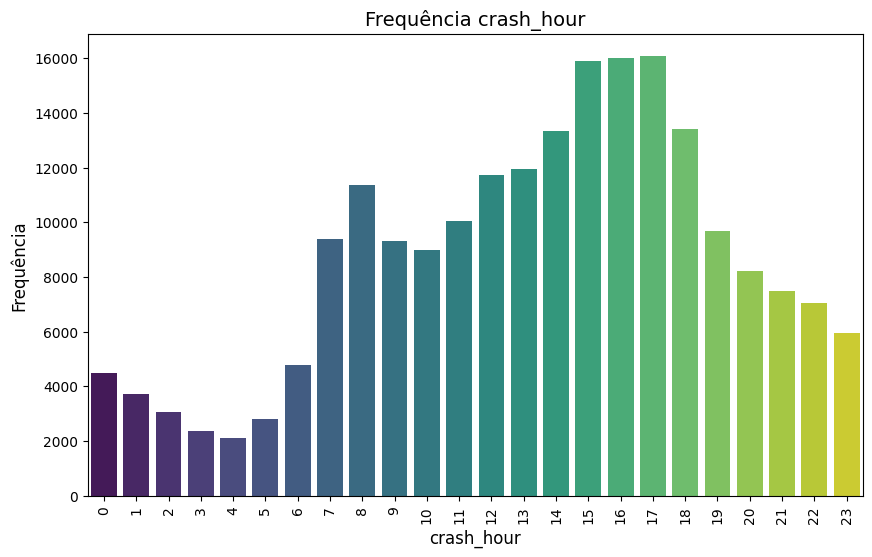

Frequência da coluna crash_hour:
    crash_hour  Frequência
0           17       16097
1           16       16025
2           15       15894
3           18       13431
4           14       13349
5           13       11949
6           12       11726
7            8       11381
8           11       10052
9           19        9683
10           7        9405
11           9        9300
12          10        8990
13          20        8219
14          21        7472
15          22        7035
16          23        5943
17           6        4772
18           0        4487
19           1        3729
20           2        3080
21           5        2819
22           3        2364
23           4        2104


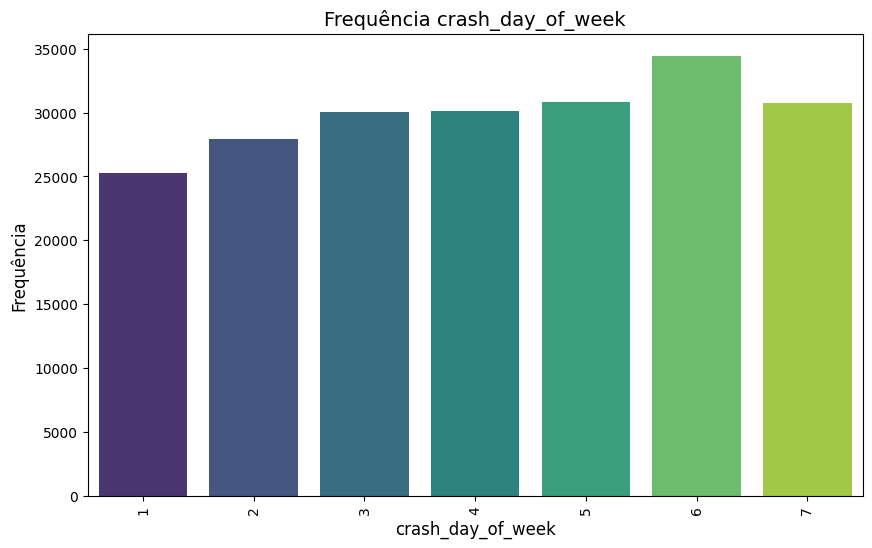

Frequência da coluna crash_day_of_week:
   crash_day_of_week  Frequência
0                  6       34458
1                  5       30787
2                  7       30710
3                  4       30093
4                  3       30074
5                  2       27938
6                  1       25246


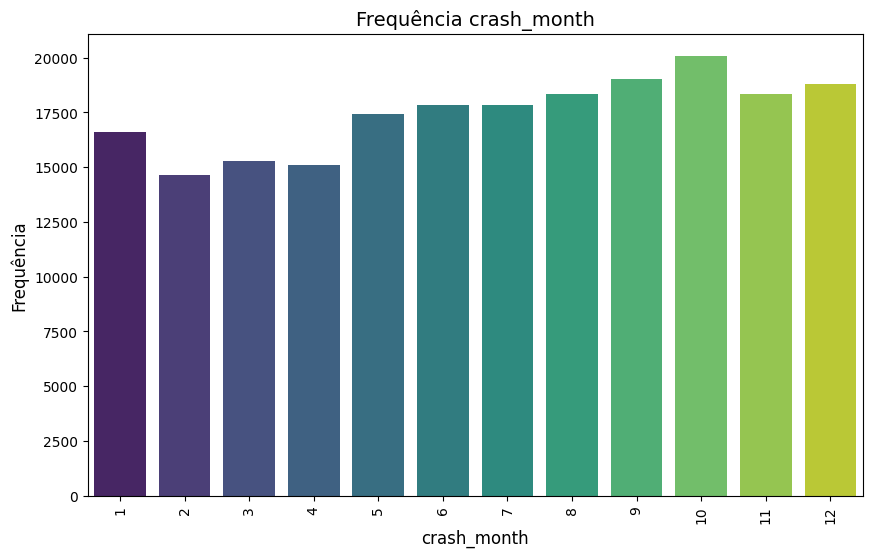

Frequência da coluna crash_month:
    crash_month  Frequência
0            10       20089
1             9       19018
2            12       18816
3             8       18350
4            11       18328
5             6       17851
6             7       17834
7             5       17432
8             1       16606
9             3       15265
10            4       15096
11            2       14621


In [6]:
# Itera pelas colunas do DataFrame
for coluna in df.columns:
    # Se a coluna estiver na lista de colunas a serem puladas, pula a iteração
    if coluna == 'crash_date':
        continue
    # Cria o gráfico de contagem
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, palette='viridis')
    plt.title(f'Frequência {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
    # Conta a frequência dos valores na coluna
    qtd = df[coluna].value_counts().reset_index(name='Frequência')
    qtd.columns = [coluna, 'Frequência']
    
    # Imprime as frequências
    print(f'Frequência da coluna {coluna}:')
    print(qtd)